In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test_census.csv', 'census.csv']


# Project Overview

In this project, we will apply supervised learning techniques and an analytical mind on data collected for the U.S. census to help CharityML (a fictitious charity organization) identify people most likely to donate to their cause. We will first explore the data to learn how the census data is recorded. Next, We will apply a series of transformations and preprocessing techniques to manipulate the data into a workable format. We will then evaluate several supervised learners of our choice on the data, and consider which is best suited for the solution. Afterwards, we will optimize the model we''ve selected and present it as a solution to CharityML. Finally, we will explore the chosen model and its predictions under the hood, to see just how well it's performing when considering the data it's given.

# Description of Dataset


This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* education_level: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

* Income: the target vaiable

The training data for this  is census.csv. The columns therefore are the same as the ones we have already been describe above..

However, the test data has a few more data cleaning issues. The 1 values in the test dataset indicate those with incomes greater than 50K, while 0 values indicate that is not the case. Our job is to find a model that performs best on the test data! Use our model to make predictions on the test_census.csv data, then provide the index and predicted income as either a 1 (if more than 50K) or 0 (if less than 50K).

Let's get started.

## ML Libraries dependency and versions

In [62]:
import numpy as np # for numeric and linear algebra operations
import pandas as pd # for data frame manipulation
import sklearn # for machine learning models
import matplotlib # for data visualization
import seaborn as sns # another data visualization library

import matplotlib.pyplot as plt
% matplotlib inline
print("------ Library Versions ------")
print("Numpy: ", np.__version__)
print("Pandas: ", pd.__version__)
print("Scikit-learn: ", sklearn.__version__)
print("Matplotlib: ", matplotlib.__version__)
print("Seaborn: ", sns.__version__)
print("--------------------------------")

------ Library Versions ------
Numpy:  1.15.4
Pandas:  0.23.4
Scikit-learn:  0.20.1
Matplotlib:  2.2.3
Seaborn:  0.9.0
--------------------------------


## Exploring the data

In [63]:
# load some extra modules
from time import time

% matplotlib inline

# load the dataset
census_data = pd.read_csv("../input/census.csv")

# printing out first five rows of the data
display(census_data.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Brief detail about the dataset

In [64]:
print("Size of the dataset: ", census_data.shape[0], "x", census_data.shape[1])

Size of the dataset:  45222 x 14


If you look at the dataset we do have 45.2k number of records to built our model. Our sole goal is to predict whether income is greater than 50k or smaller than 50k. Then why dont we just look at both of the class after all this will be a binary classification problem. As we will normalize the income column into 0/1 on the basis of > or <= 50k. 

In [65]:
# number of records
total_records = len(census_data)

# number of records with income > 50k
records_greater_50k = len(census_data[census_data["income"] == ">50K"])

# number of records with income <= 50k
records_smaller_50k = len(census_data[census_data["income"] == "<=50K"])

# percentage of individuals with income more than 50K
perc_income_50k = (records_greater_50k / total_records) * 100

print("Total number of records: {}".format(total_records))
print("Number of people with income more than 50k: {}".format(records_greater_50k))
print("Number of people with income less than 50k: {}".format(records_smaller_50k))
print("Percentage of people with income more than 50k: {}".format(round(perc_income_50k, 2)))

Total number of records: 45222
Number of people with income more than 50k: 11208
Number of people with income less than 50k: 34014
Percentage of people with income more than 50k: 24.78


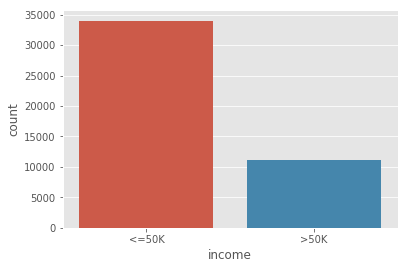

In [66]:
# let's plot the count the target variable
sns.countplot(census_data['income'], label='count')

If we just look at the number than we can see that there are more number of people with income less than 50K than people with income more than 50K.
And about 24.78 ~ 25% of the data i.e people having more than 50K income. We can draw conclusion that people with less income tends to donate more. That's interesting, isn't it!!!

## Preprocessing of data

Generally a data preprocessing involves following 3 steps.

* Formatting: The data you have selected may not be in a format that is suitable for you to work with. The data may be in a relational database and you would like it in a flat file, or the data may be in a proprietary file format and you would like it in a relational database or a text file.
* Cleaning: Cleaning data is the removal or fixing of missing data. There may be data instances that are incomplete and do not carry the data you believe you need to address the problem. These instances may need to be removed. Additionally, there may be sensitive information in some of the attributes and these attributes may need to be anonymized or removed from the data entirely.
* Sampling: There may be far more selected data available than you need to work with. More data can result in much longer running times for algorithms and larger computational and memory requirements. You can take a smaller representative sample of the selected data that may be much faster for exploring and prototyping solutions before considering the whole dataset.

Three common data transformations are scaling, attribute decompositions and attribute aggregations. This step is also referred to as feature engineering.

* Scaling: The preprocessed data may contain attributes with a mixtures of scales for various quantities such as dollars, kilograms and sales volume. Many machine learning methods like data attributes to have the same scale such as between 0 and 1 for the smallest and largest value for a given feature. Consider any feature scaling you may need to perform.
* Decomposition: There may be features that represent a complex concept that may be more useful to a machine learning method when split into the constituent parts. An example is a date that may have day and time components that in turn could be split out further. Perhaps only the hour of day is relevant to the problem being solved. consider what feature decompositions you can perform.
* Aggregation: There may be features that can be aggregated into a single feature that would be more meaningful to the problem you are trying to solve. For example, there may be a data instances for each time a customer logged into a system that could be aggregated into a count for the number of logins allowing the additional instances to be discarded. Consider what type of feature aggregations could perform.

We will walk through each data preprocessing step.

So Our data is well formatted data as we wanted it to be. We got our required pandas dataframe which has observations and attributes. Now it's time to check for any missing value present over in the dataset.

In [67]:
# showing a detailed info about each attribute
display(census_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


None

It looks like there isn't any missing values in our data. But to ensure let's print the columns with any missing values.

In [68]:
print(census_data.columns[census_data.isnull().any()])

Index([], dtype='object')


Ok so the list is empty which means we are sure now that we dont have any missing value. So let's move on to the next step. So I think we don't need to sample our data in this case as we don't have such a large dataset so instead of sampling the dataset we will go with the whole dataset, all at once.

So we just checked the general 3 steps of preprocessing, and our dataset looks fine. We are ready to go now. 
Hey wait, aren't we forgetting something! Yes we need to transform our dataset before training any model. So let's dive into that.

Let's see the distibution of our data.
What is a distribution ?
A distibution tells us that how the data is distributed which means how its vary for each data point. If the dataset has skewed features then the data points may lies around a single value which will reduce the performance measure. 

In [69]:
import math
plt.style.use('ggplot')
# import warnings
# warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

# Distirbution visualizatinon
def dist_visualize(data, skewed_feature, transformed=False):
    """ Visualizing the distribution of a skewed feature """
    # figure object
    fig = plt.figure(figsize=(12, 9))
    
    # plotting the distribution
    for i, feature in enumerate(skewed_feature):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins=25, color='#00AFF0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])
        
    if transformed:
        fig.suptitle("Log transformed distribution of continoues data")
        
    else:
        fig.suptitle("Skewed distribution of data")
    fig.tight_layout()
    fig.show()

Let's draw the distribution of continous variables and then we will visualize the skewed distributions separately.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33b5a729e8>,
      dtype=object)

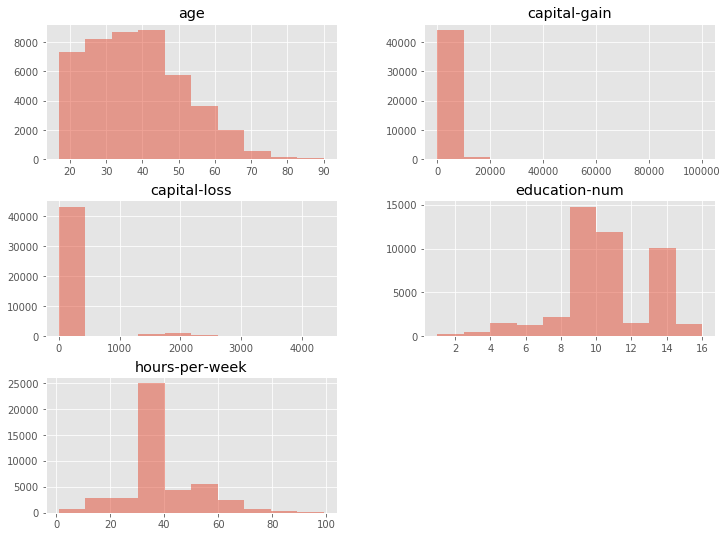

In [70]:
census_data.hist(alpha=0.5, figsize=(12, 9))


From the above histogram we can see that 'capital-loss' and 'capital-gain' are the one who has skewed distribution.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


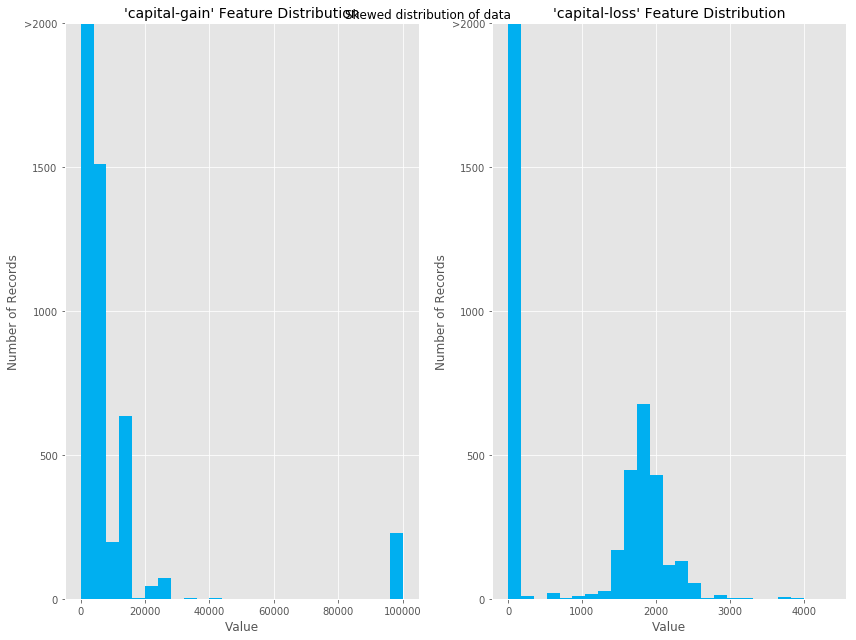

In [71]:
skewed_var = ['capital-gain', 'capital-loss']
dist_visualize(census_data, skewed_var)

Now we can see more clearly how both the variable are centered to a single value 0, which will affect our predictive model. So how will we deal with these two variable, this where we need to apply data transformation. In this case we will apply 'log' transformation so that very large and small values will not affect the learning algorithm. But there is a catch, that we can't apply logarithm to 0 value. We have to translate value with a small amount above 0.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


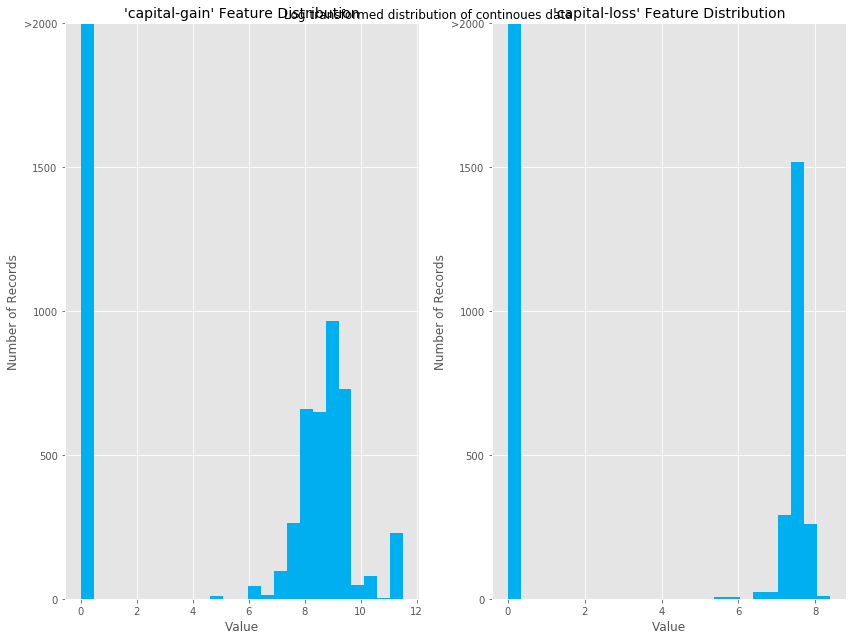

In [72]:
# split feature and target
data_y = census_data['income']
data_X = census_data.drop('income', axis=1)

data_X[skewed_var] = data_X[skewed_var].apply(lambda x: np.log(x + 1))

# visualizing after log transformation
dist_visualize(data_X, skewed_var, transformed=True)

Finally we are able to transform our two feature are highly skewed distributed, now after applying log transformation it seems to be in a good range of valus rather than surrounded by a single value.

## Statistical description

In [73]:
display(data_X.describe())

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,0.740759,0.355489,40.938017
std,13.217870,2.552881,2.466527,1.595914,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,11.512925,8.379539,99.000000


We do have only 5 numerical columns, so if we look at them then we can find out is there any necessity of applying normalization or not.
* first look at `age` the minimum value is 17 while max is 90 with a mean of 38.5 which seems to be bit normal.
* In `education-num` the min is 1.0 while max is 16.0 with a mean of 10, this may or may not be in normal form.
* Both `capital-gain` and `capital-loss` are in well distributed after applying logarithm transformation.
* `hours-per-week` may be needed normalization.

Let's see all these in a visualization way.

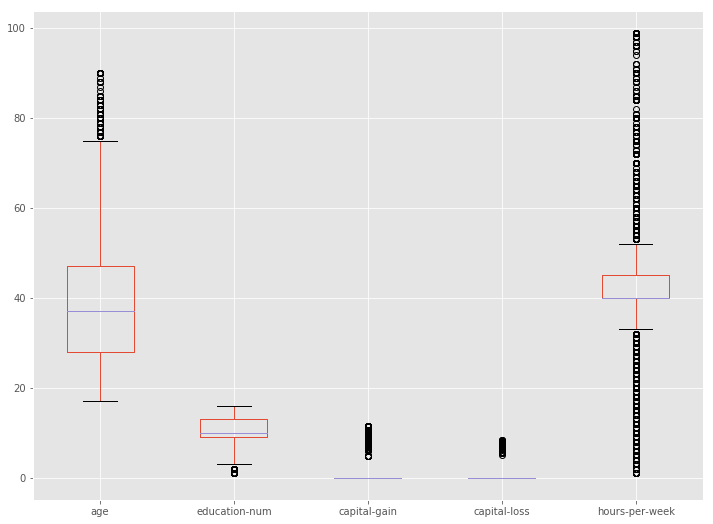

In [74]:
data_X[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].boxplot(figsize=(12, 9))

## Feature normalization

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

data_X[numeric] = scaler.fit_transform(data_X[numeric])

display(data_X[numeric].head())

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.034201,1.128753,2.815336,-0.222752,-0.078120
1,0.866417,1.128753,-0.300328,-0.222752,-2.326738
2,-0.041455,-0.438122,-0.300328,-0.222752,-0.078120
3,1.093385,-1.221559,-0.300328,-0.222752,-0.078120
4,-0.798015,1.128753,-0.300328,-0.222752,-0.078120


In [76]:
display(data_X[numeric].tail())

,age,education-num,capital-gain,capital-loss,hours-per-week
45217,-0.419735,1.128753,-0.300328,-0.222752,-0.078120
45218,0.034201,1.128753,-0.300328,-0.222752,-0.411249
45219,-0.041455,1.128753,-0.300328,-0.222752,0.754701
45220,0.412481,1.128753,3.188207,-0.222752,-0.078120
45221,-0.268423,1.128753,-0.300328,-0.222752,1.587523


## Data Preprocessing for categorical variables

If we look at our data then except 5 columns the rest are non-numeric and when we use sklearn to train our model it expects that the variables should be numeric otherwise it will reduce the overall performance of our model.
So to counter this problem we need to transform our categorical variable into numeric type. We can easily do these things using pandas or sklearn.
In this case we will use get_dummies() for the encoding. 
We also need to transform our target variable as it is a object for now we will convert it into 0 and 1 by the following convention.
* if 'income' is "<=50K" then it will be 0
* if 'income' is ">50K" then it will be 1


In [77]:
data_X = pd.get_dummies(data_X)

data_y = pd.get_dummies(data_y)

# let's see the table after hot encoding
display(data_X.head())

# have a look at our target column after encoding
display(data_y.head())

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.034201,1.128753,2.815336,-0.222752,-0.078120,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.866417,1.128753,-0.300328,-0.222752,-2.326738,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.041455,-0.438122,-0.300328,-0.222752,-0.078120,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.093385,-1.221559,-0.300328,-0.222752,-0.078120,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.798015,1.128753,-0.300328,-0.222752,-0.078120,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Oops!! In our target variable we got two columns, but we need only one column so let's fix that.

In [78]:
data_y.drop(labels=data_y.columns[0], axis=1, inplace=True)

display(data_y.head())

,>50K
0,0
1,0
2,0
3,0
4,0


In [79]:
data_y.tail()

,>50K
45217,0
45218,0
45219,0
45220,0
45221,1


In [80]:
census_data['income'].tail()

45217    <=50K
45218    <=50K
45219    <=50K
45220    <=50K
45221     >50K
Name: income, dtype: object

For clarification let's understand our target variable encoding, here we keep only '>50K'. so the encoding as follows:
* Look at row #45220 value of  '>50K' is 0 which means it is false, that signifies it is '<=50K'
* But in row #45221 value of '>50K' is 1 which means it is True, so the value is '>50K'.

We can verify through the census_data, 'income' table.

# Prepare Dataset for Training

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.2, random_state=42)

# check our training and test set size
print("Number of Training dataset sample", len(X_train))
print("Number of Test dataset sample ", len(X_test))

Number of Training dataset sample 36177
Number of Test dataset sample  9045


# Machine Learning Models

## Performance Measure

This is a binary classification problem as we have to predict whether the income is >50K or <=50K. So basically for a machine learning classification we do have the following performance measures are available.
1. Accuracy
        accuracy = #corrected predictions / #total predictions
2. Logarithmic Loss or Log-loss
3. Confusion Matrix
    * True Positives
    * True Negatives
    * False postives
    * False Negatives
4. Area Under Curve
5. F1 Score
        

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total.
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [82]:
TP = np.sum(data_y)[0]
FP = data_y.count()[0] - TP

TN = 0 # As wo dont have have any negative predictions
FN = 0 

N = TP + FP + TN + FN

accuracy = (TP + TN) / N
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Traditional F1 Score
f1_score = 2 * ((precision * recall ) / (precision + recall))

print("Accuracy for a base model: ", round(accuracy,2))
print("F1 Score: ", round(f1_score,2))

Accuracy for a base model:  0.25
F1 Score:  0.4


## ML Algorithms

1.  Logistic Regression:
    It is a linear model, easy to apply, but problem is it will take a very long time in case of large data and hard to learn from complex data.
2. Decision Tree:
    A hierarchy tree to apply decision on each level, easily prone to overfit.
3. Support Vector Machine
    A boundary based model by separating classes through a hyper plane and kernel which calculate the distance between two points.
4. Naive Bayes:
    Based on Conditional probablity and bayes theorem.
    

In [85]:
# Model Prediction Pipeline
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from time import time
# Training model
def prediction(learner, sample_size, X_train, X_test, y_train, y_test):
    '''
    Train the model and calculate performance metrics
    :param learner: learning algorithm
    :param sample_size: size of the sample
    :param X_train: Training feature set
    :param y_train: training target set
    :param X_test: Testing feature set
    :param y_test: Testing target set
    '''
    
    results = {}
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    # Fitting the learner model to training sample dataset
    start = time()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    
    # total training time
    results['train-time'] = end-start
    
    # Predictions on test set and first 200 training sample
    start = time()
    pred_test = learner.predict(X_test)
    pred_train = learner.predict(X_train[:200])
    end = time()
    
    # total prediction time
    results['pred-time'] = end - start
    
    results['acc_train'] = accuracy_score(y_train[:200], pred_train)
    results['acc_test'] = accuracy_score(y_test, pred_test)
    
    results['f1_train'] = f1_score(y_train[:200], pred_train)
    results['f1_test'] = f1_score(y_test, pred_test)
    
    results['auc_train'] = roc_auc_score(y_train[:200], pred_train)
    results['auc_test'] = roc_auc_score(y_test, pred_test)
    
    print("{} trained on {} samples".format(learner.__class__.__name__, sample_size))
    
    return results

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Learning models
lr_clf = LogisticRegression(solver='liblinear',random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(gamma='auto',random_state=42)
nb_clf = GaussianNB()

clf_list = [lr_clf, dt_clf, svm_clf, nb_clf]
sample_100 = len(y_train)
sample_10 = int((sample_100 * 10)/100)
sample_1 = int((sample_100)/100)

pred_res = {}
for clf in clf_list:
    clf_name = clf.__class__.__name__
    pred_res[clf_name] = {}
    for i, sample in enumerate([sample_1, sample_10, sample_100]):
        pred_res [clf_name][i] = prediction(clf, sample, X_train, X_test, y_train, y_test)

LogisticRegression trained on 361 samples
LogisticRegression trained on 3617 samples
LogisticRegression trained on 36177 samples
DecisionTreeClassifier trained on 361 samples
DecisionTreeClassifier trained on 3617 samples
DecisionTreeClassifier trained on 36177 samples
SVC trained on 361 samples
SVC trained on 3617 samples
SVC trained on 36177 samples
GaussianNB trained on 361 samples
GaussianNB trained on 3617 samples
GaussianNB trained on 36177 samples
